# Loan Status Prediction

### Lifecycle of Machine Learning
- Understanding the Problem Statement
- Data Collection
- Exploratory Data Analysis
- Data Preprocessing
- Model Building
- Model Evaluation
- Choose Best Model

# 1. Problem Statement
- In this Loan Status Prediction dataset, we have the data of applicants who previously applied for the loan based on the property which is a Property Loan.
- The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc…
- Our goal is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.

# 2. Data Collection
- Dataset collected from this link: https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data
- Dataset contains 381 rows and 13 columns

# 3. Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# 4. Basic Understanding of the Data

In [2]:
df = pd.read_csv(r"data/loan_data.csv")

### 4.1 Size of the dataset

In [3]:
df.shape

(381, 13)

### 4.2 First 5 rows of the data

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


### 4.3 Datatype of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


### 4.4 Check Missing values

In [6]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

**Conclusion**
- There are missing values in `Gender`, `Dependents`, `Self_Employed`, `Loan_amount_term` and `Credit_history`

### 4.5 Statistcal Analysis of data

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


### 4.6 Check for duplicate values

In [8]:
df.duplicated().sum()

0

**Conclusion**
- There are no duplicate values

### 4.7 Categories in each column

In [9]:
df.nunique()

Loan_ID              381
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      322
CoapplicantIncome    182
LoanAmount           101
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# 5. Univariate Analysis

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### 5.1 What is the distribution of gender among loan applicants?


<Axes: xlabel='Gender', ylabel='count'>

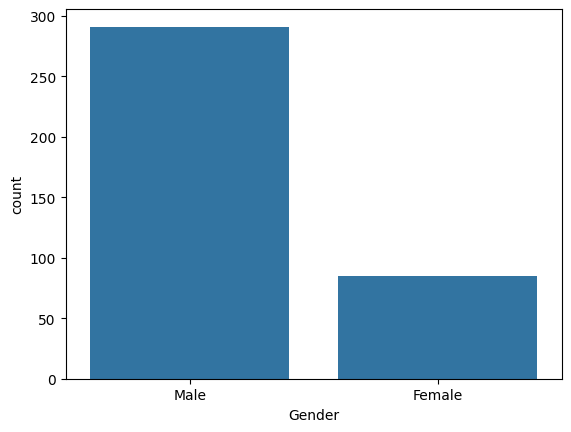

In [11]:
sns.countplot(x="Gender",data=df)

<Axes: ylabel='count'>

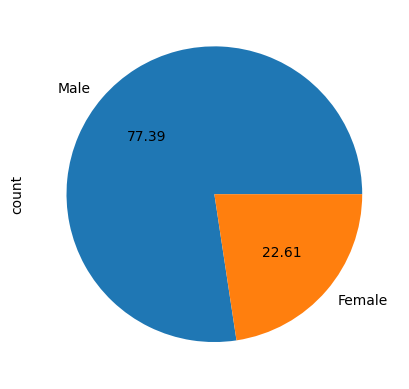

In [12]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Majority of the loan applicants are Male.
- 77% accounts for Male and 22% for Female

### 5.2 What percentage of loan applicants are married?


<Axes: xlabel='Married', ylabel='count'>

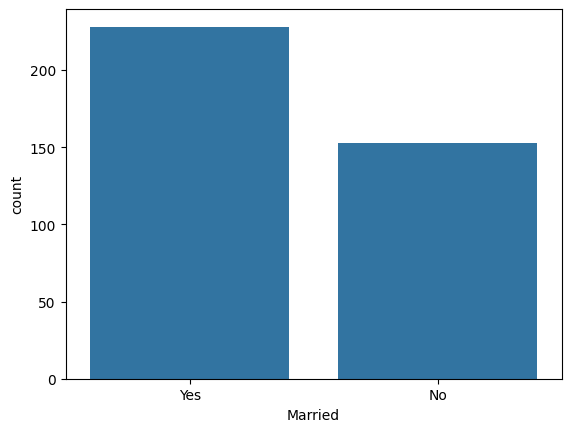

In [13]:
sns.countplot(x="Married",data=df)

<Axes: ylabel='count'>

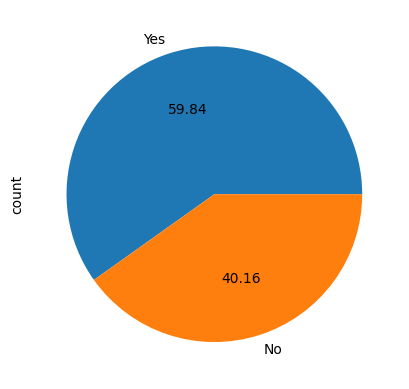

In [14]:
df["Married"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- 59.84% of the loan applicants are married

### 5.3 How does the number of dependents influence loan approval?


<Axes: xlabel='Dependents', ylabel='count'>

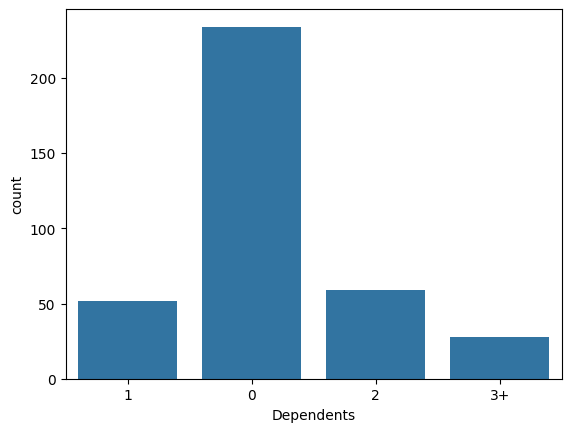

In [15]:
sns.countplot(x="Dependents",data=df)

<Axes: ylabel='count'>

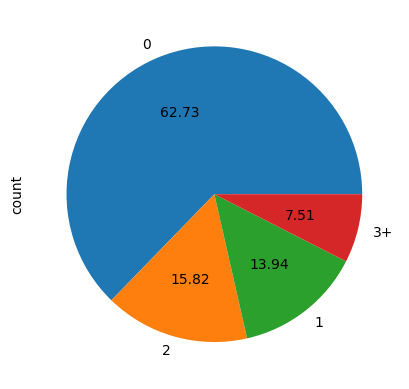

In [16]:
df["Dependents"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Majority of the loan applicant do not have any Dependents.
- There are less number of applicant whose dependents is more than 3.

### 5.4 What is the educational background of the applicants?


<Axes: xlabel='Education', ylabel='count'>

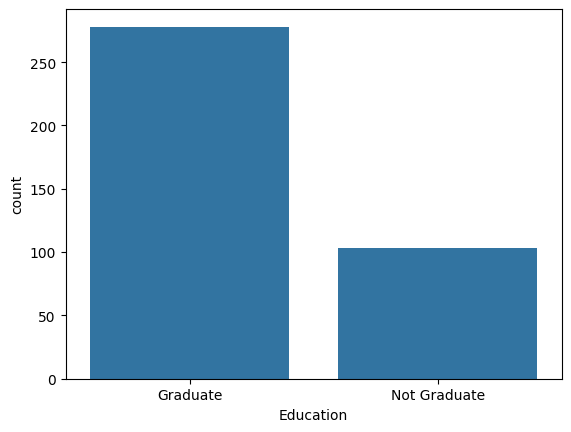

In [17]:
sns.countplot(x="Education",data=df)

<Axes: ylabel='count'>

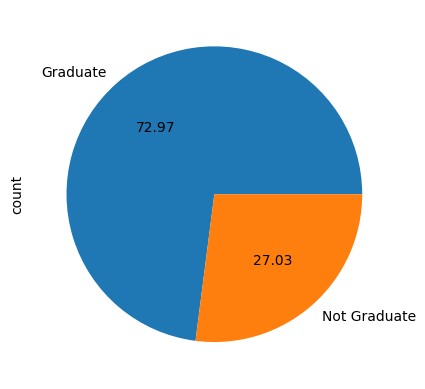

In [18]:
df["Education"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Majority of the loan applicants are Graduate which account for 72.97%.

### 5.5 How many applicants are self-employed?


<Axes: xlabel='Self_Employed', ylabel='count'>

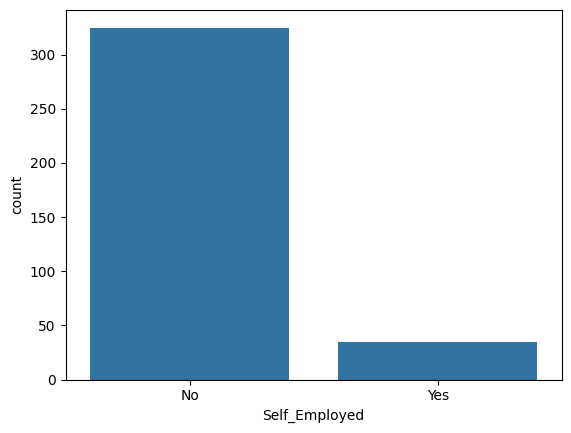

In [19]:
sns.countplot(x="Self_Employed",data=df)

<Axes: ylabel='count'>

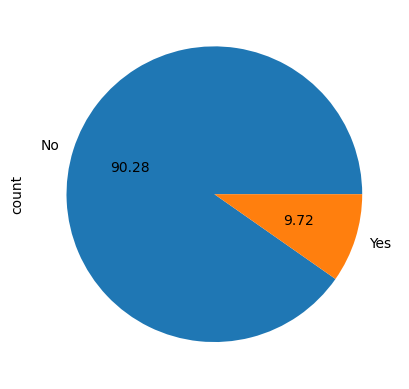

In [20]:
df["Self_Employed"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Around 9% loan applicants are Self-Employed

### 5.6 What percentage of applicants have a favorable credit history?


<Axes: xlabel='Credit_History', ylabel='count'>

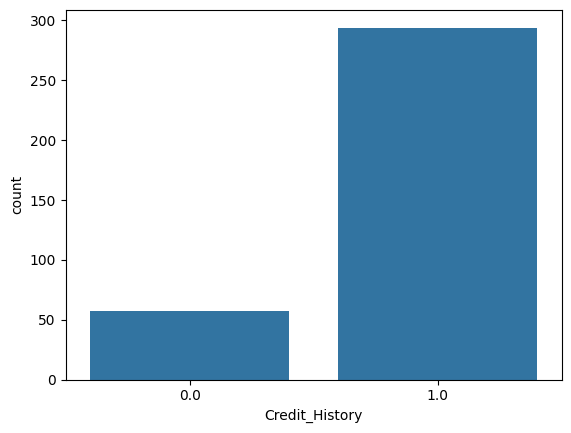

In [21]:
sns.countplot(x="Credit_History",data=df)

<Axes: ylabel='count'>

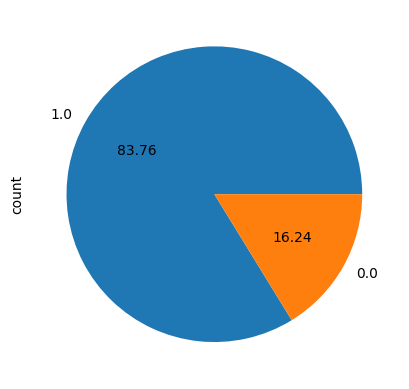

In [22]:
df["Credit_History"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Majority of the loan applicants have favourable credit history. i.e around 83%.

### 5.7 What is the distribution of loan applicants by property area (urban, semi-urban, rural)?


<Axes: xlabel='Property_Area', ylabel='count'>

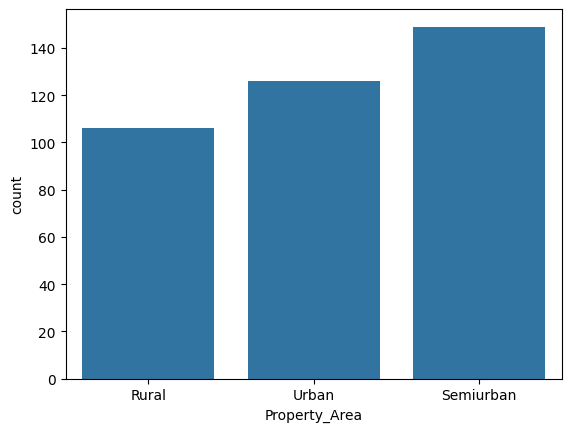

In [23]:
sns.countplot(x="Property_Area",data=df)

<Axes: ylabel='count'>

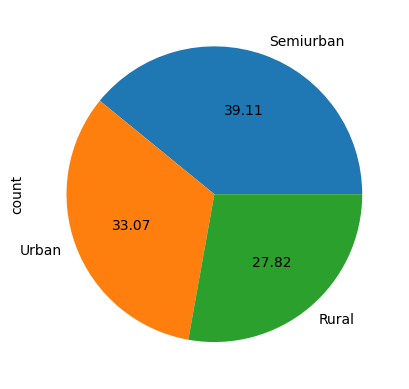

In [24]:
df["Property_Area"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Majority of the loan applicants are from Semi-Urban region followed by Urban.

### 5.8 What percentage of the applicants had their loans approved versus denied?


<Axes: xlabel='Loan_Status', ylabel='count'>

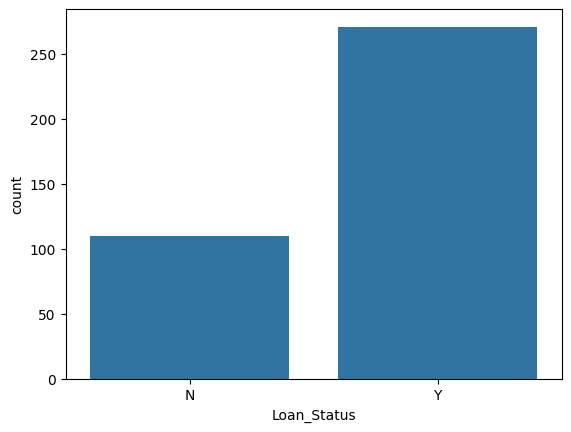

In [25]:
sns.countplot(x="Loan_Status",data=df)

<Axes: ylabel='count'>

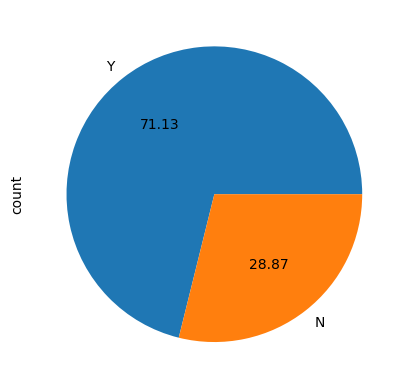

In [26]:
df["Loan_Status"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Majority of the loan applicants loan is getting approved which account for 71.13%.

### 5.9 What is the average and median income of loan applicants?


In [27]:
df["ApplicantIncome"].mean()

3579.845144356955

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

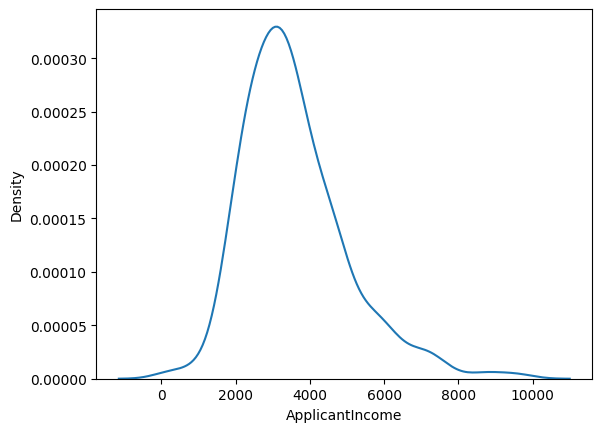

In [28]:
sns.kdeplot(df["ApplicantIncome"])

<Axes: ylabel='ApplicantIncome'>

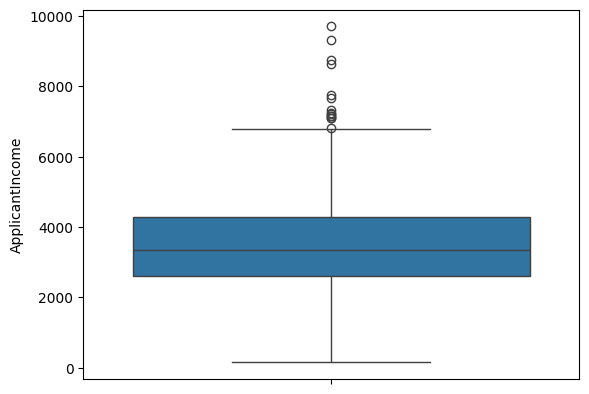

In [29]:
sns.boxplot(df["ApplicantIncome"])

In [30]:
df["ApplicantIncome"].skew()

1.1197513520703462

**Conclusion**
- It is right skewed distribution
- It has a lot of outliers
- Majority of the income is between 2000 and 4000

### 5.10 What is the distribution of coapplicant income?


In [31]:
df["CoapplicantIncome"].mean()

1277.2753805476116

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

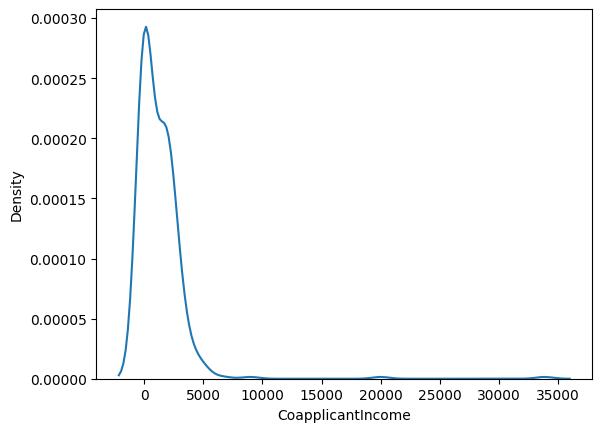

In [32]:
sns.kdeplot(df["CoapplicantIncome"])

<Axes: ylabel='CoapplicantIncome'>

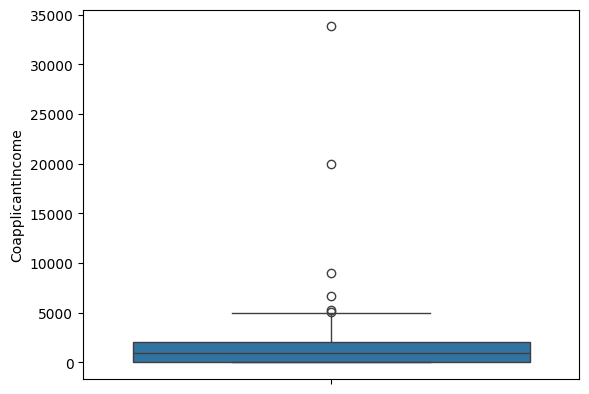

In [33]:
sns.boxplot(df["CoapplicantIncome"])

In [34]:
df["CoapplicantIncome"].skew()

8.660692363752187

**Conclusion**
- It is extremely right skewed distribution
- It has a lot of outliers
- In between there is a peak in the Coapplicants income

### 5.11 What is the average loan term length among applicants?


<Axes: xlabel='LoanAmount', ylabel='Density'>

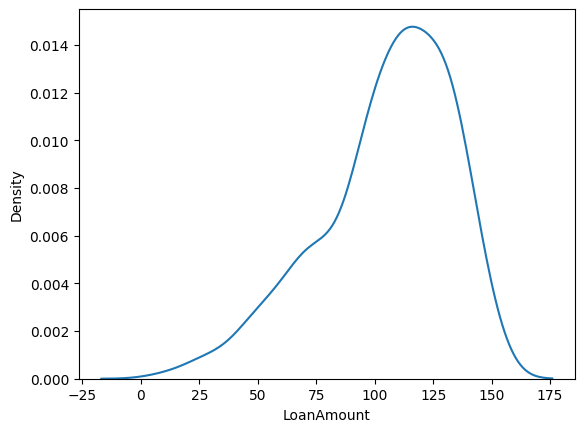

In [35]:
sns.kdeplot(df["LoanAmount"])

<Axes: ylabel='LoanAmount'>

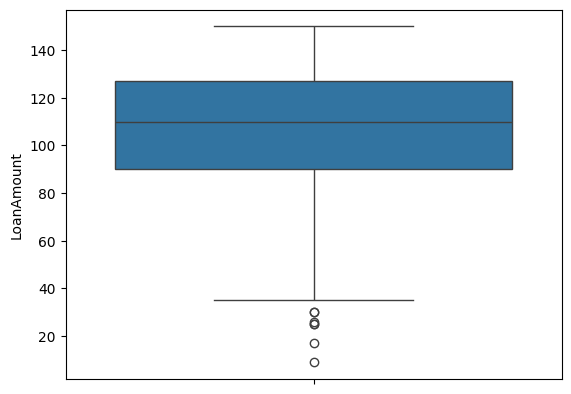

In [36]:
sns.boxplot(df["LoanAmount"])

In [37]:
df["LoanAmount"].skew()

-0.8042824178079573

**Conclusion**
- It is left-skewed distribution
- It has a lot of outliers
- Majority loan applicants have higher loan amount

### 5.12 What is the average loan term length among applicants?


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

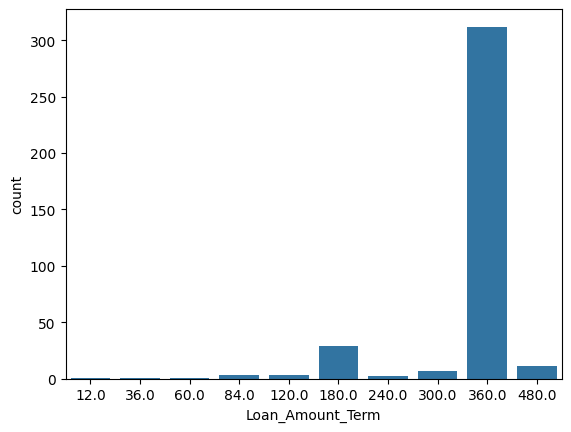

In [38]:
sns.countplot(x="Loan_Amount_Term",data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

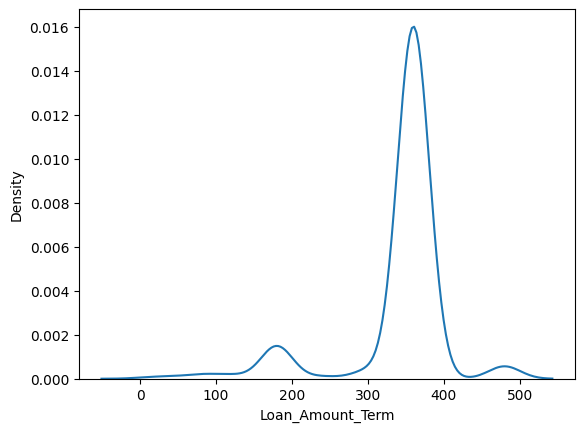

In [39]:
sns.kdeplot(df["Loan_Amount_Term"])

<Axes: ylabel='Loan_Amount_Term'>

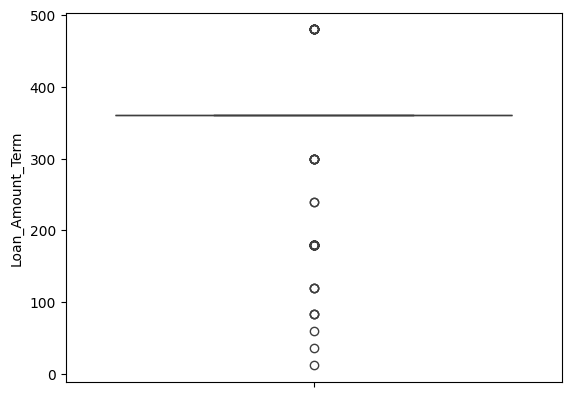

In [40]:
sns.boxplot(df["Loan_Amount_Term"])

In [41]:
df["Loan_Amount_Term"].mean()

340.86486486486484

**Conclusion**
- We can treat this feature as categorical with varying loan amount term.
- Average is 340

# 6. Bivariate Analysis

### 6.1 Is there a significant difference in loan approval based on gender?


<Axes: xlabel='Loan_Status'>

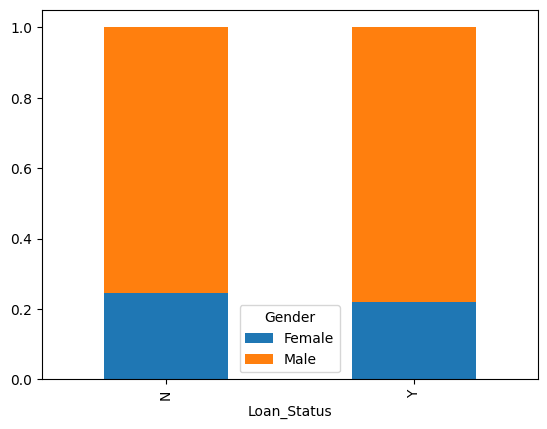

In [42]:
crosstab = pd.crosstab(df['Loan_Status'], df['Gender'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Gender', ylabel='count'>

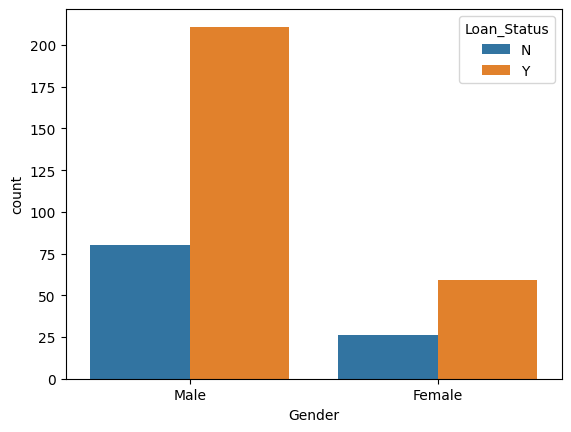

In [43]:
sns.countplot(x="Gender",hue="Loan_Status",data=df)

**Conclusion**
- Majority of the loan applicant for Male have been approved.

### 6.2 Do married applicants have a higher approval rate compared to single applicants?


<Axes: xlabel='Loan_Status'>

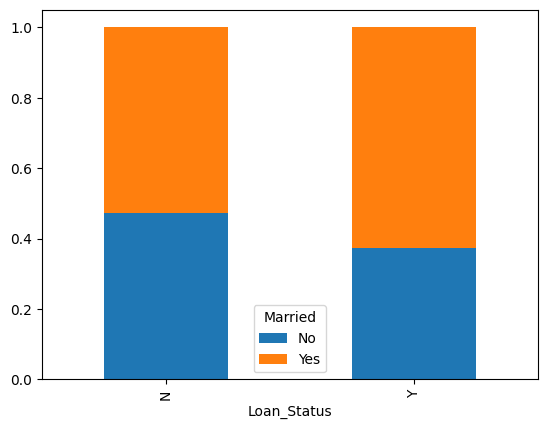

In [44]:
crosstab = pd.crosstab(df['Loan_Status'], df['Married'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Married', ylabel='count'>

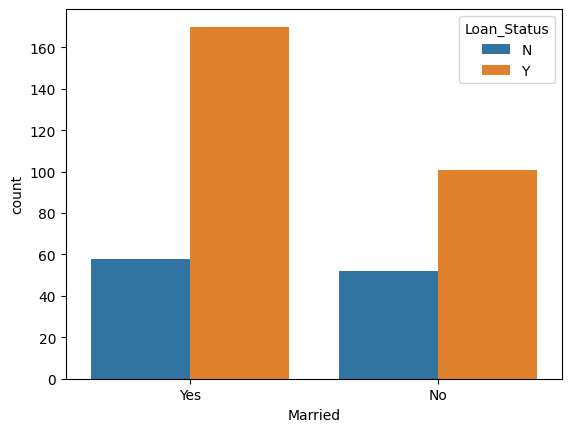

In [45]:
sns.countplot(x="Married",hue="Loan_Status",data=df)

**Conclusion**
- Majority of the loan applicants who are Married have higher chance of the loan getting approved

### 6.3 Does the number of dependents affect the loan approval rate?


<Axes: xlabel='Loan_Status'>

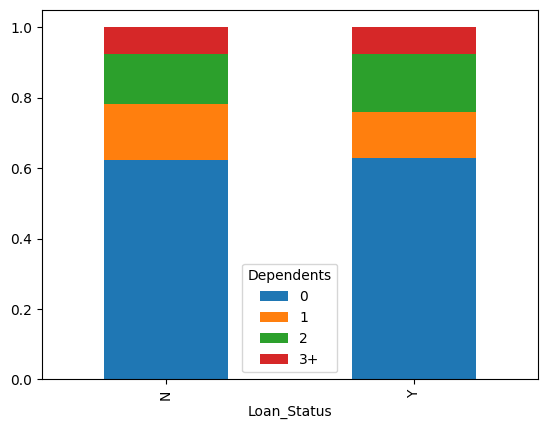

In [46]:
crosstab = pd.crosstab(df['Loan_Status'], df['Dependents'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Dependents', ylabel='count'>

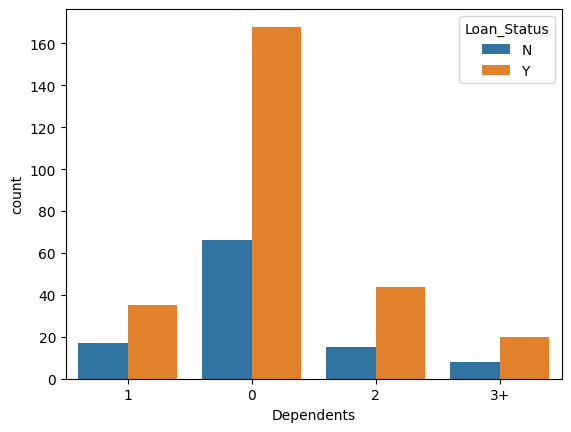

In [47]:
sns.countplot(x="Dependents",hue="Loan_Status",data=df)

**Conclusion**
- Majority of the loan applicant who do not have any dependents have higher chance of the loan getting approved

### 6.4 How does the level of education impact loan approval?


<Axes: xlabel='Loan_Status'>

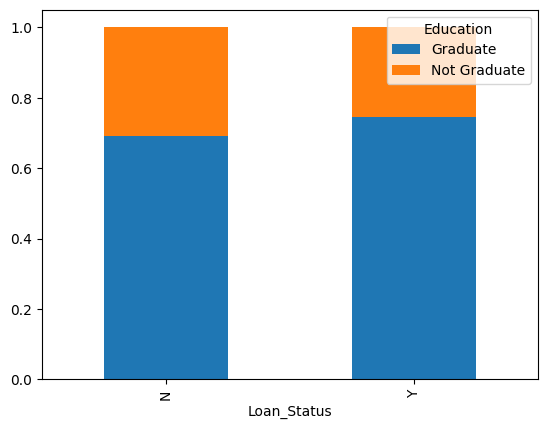

In [48]:
crosstab = pd.crosstab(df['Loan_Status'], df['Education'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Education', ylabel='count'>

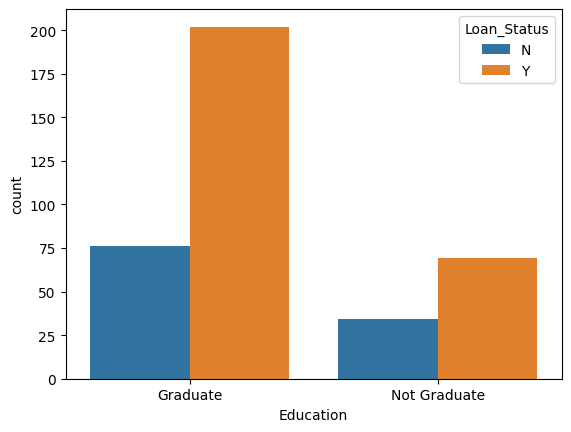

In [49]:
sns.countplot(x="Education",hue="Loan_Status",data=df)

**Conclusion**
- Majority of the loan applicant who are graduate have higher chance of loan getting approved

### 6.5 Are self-employed applicants less likely to get their loans approved compared to those who are not self-employed?

<Axes: xlabel='Loan_Status'>

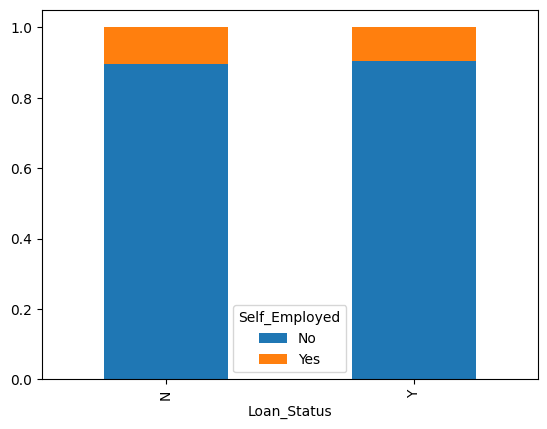

In [50]:
crosstab = pd.crosstab(df['Loan_Status'], df['Self_Employed'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Self_Employed', ylabel='count'>

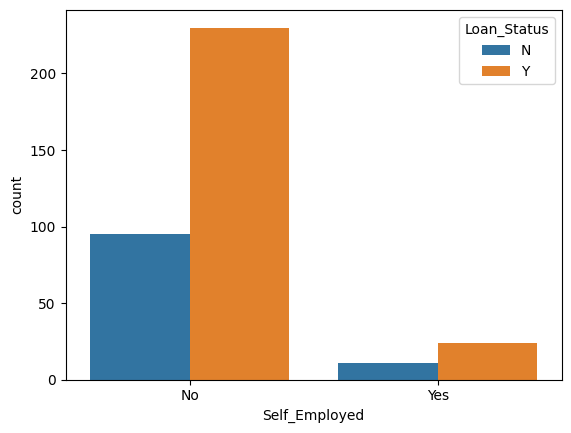

In [51]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df)

**Conclusion**
- Self-Employed Employees have a very low chance of the loan getting approved.

### 6.6 How crucial is a positive credit history in determining loan approval?


<Axes: xlabel='Loan_Status'>

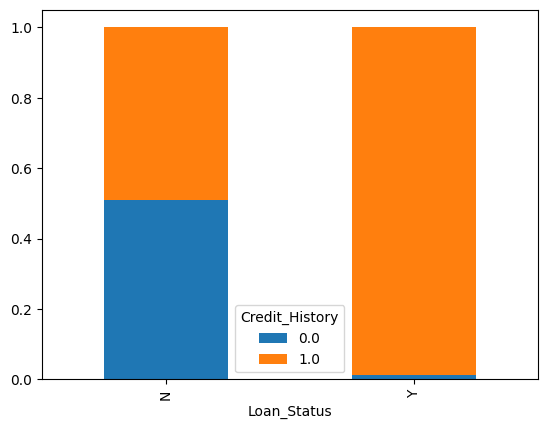

In [52]:
crosstab = pd.crosstab(df['Loan_Status'], df['Credit_History'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Credit_History', ylabel='count'>

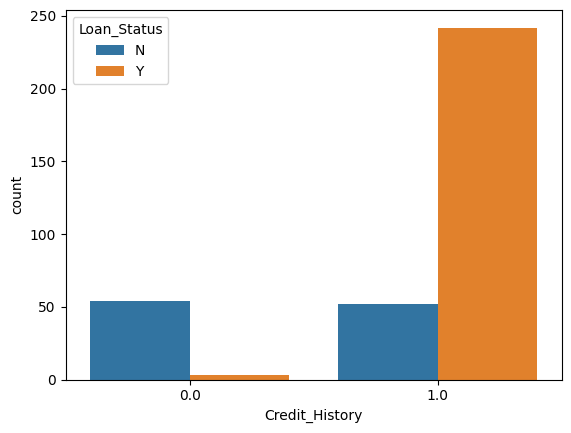

In [53]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=df)

**Conclusion**
- Loan applicant who have credit history have higher chance of loan getting approved

### 6.7 Are loans for properties in urban areas more likely to be approved compared to rural or semi-urban areas?

<Axes: xlabel='Loan_Status'>

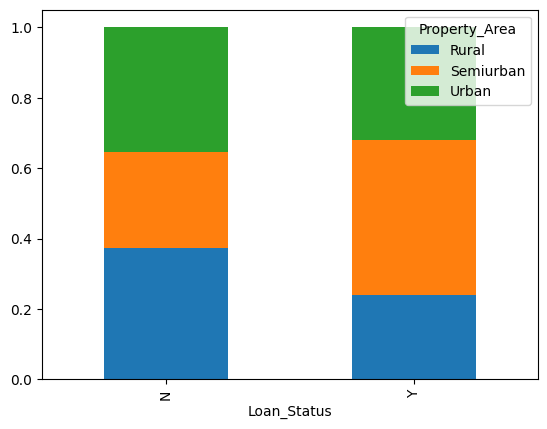

In [54]:
crosstab = pd.crosstab(df['Loan_Status'], df['Property_Area'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Property_Area', ylabel='count'>

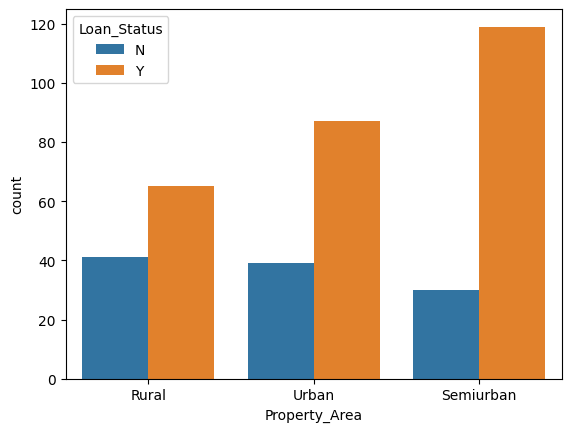

In [55]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=df)

**Conclusion**
- High chance of loan getting approved for loan applicant living Semi-Urban Area

### 6.8 Do higher-income applicants have a higher probability of getting their loans approved?


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

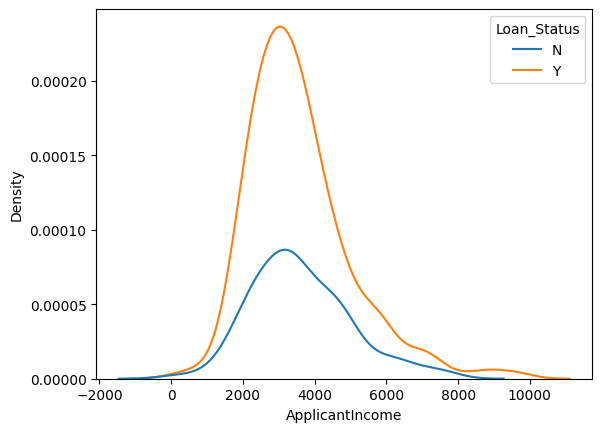

In [56]:
sns.kdeplot(x="ApplicantIncome",data=df,hue="Loan_Status")

**Conclusion**
- Higher probability for loan getting approved for the loan applicant who have income between 3000 to 4000.

### 6.9 How does coapplicant income impact the likelihood of loan approval?


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

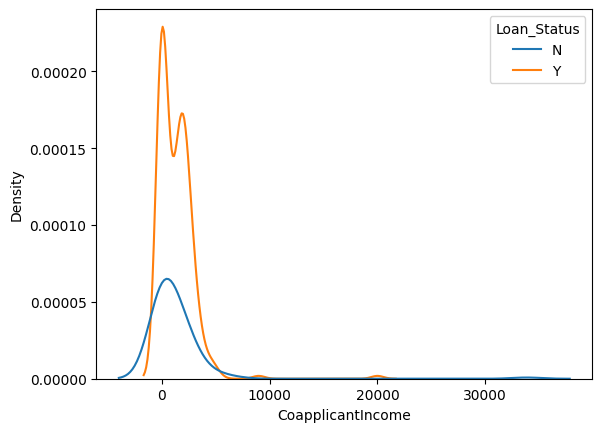

In [57]:
sns.kdeplot(x="CoapplicantIncome",data=df,hue="Loan_Status")

**Conclusion**
- There are peaks in the coapplicant income range between 5000 and 10000. So higher chance of the loan getting approved.

### 6.10 Do applicants requesting larger loan amounts have a lower approval rate?


<Axes: xlabel='LoanAmount', ylabel='Density'>

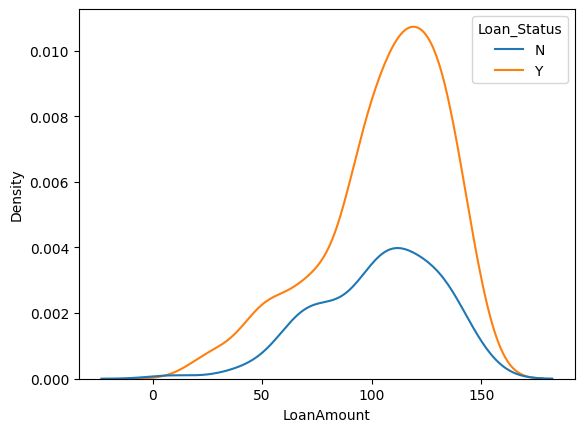

In [58]:
sns.kdeplot(x="LoanAmount",data=df,hue="Loan_Status")

**Conclusion**
- Higher loan amount much higher chance of loan getting approved.

### 6.11 Does the length of the loan term impact the approval rate?


<Axes: xlabel='Loan_Status'>

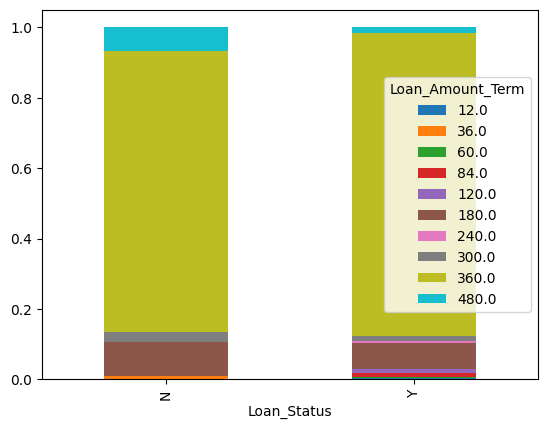

In [59]:
crosstab = pd.crosstab(df['Loan_Status'], df['Loan_Amount_Term'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

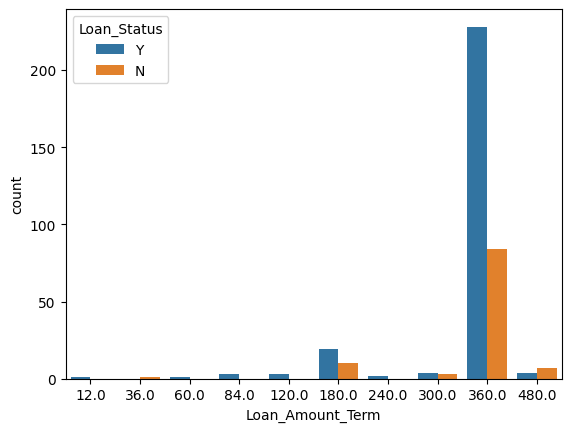

In [60]:
sns.countplot(x="Loan_Amount_Term",hue="Loan_Status",data=df)

**Conclusion**
- Majority of the loan gets approved when loan amount term is 360.

# 7. Multivariate Analysis

In [61]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000


<Axes: >

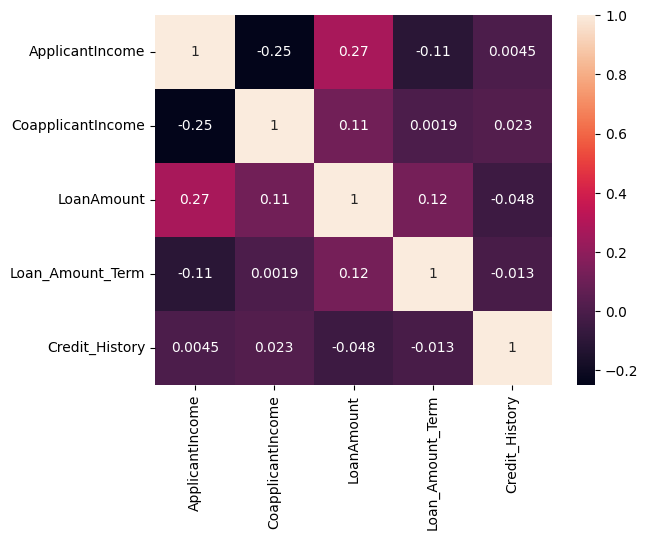

In [62]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

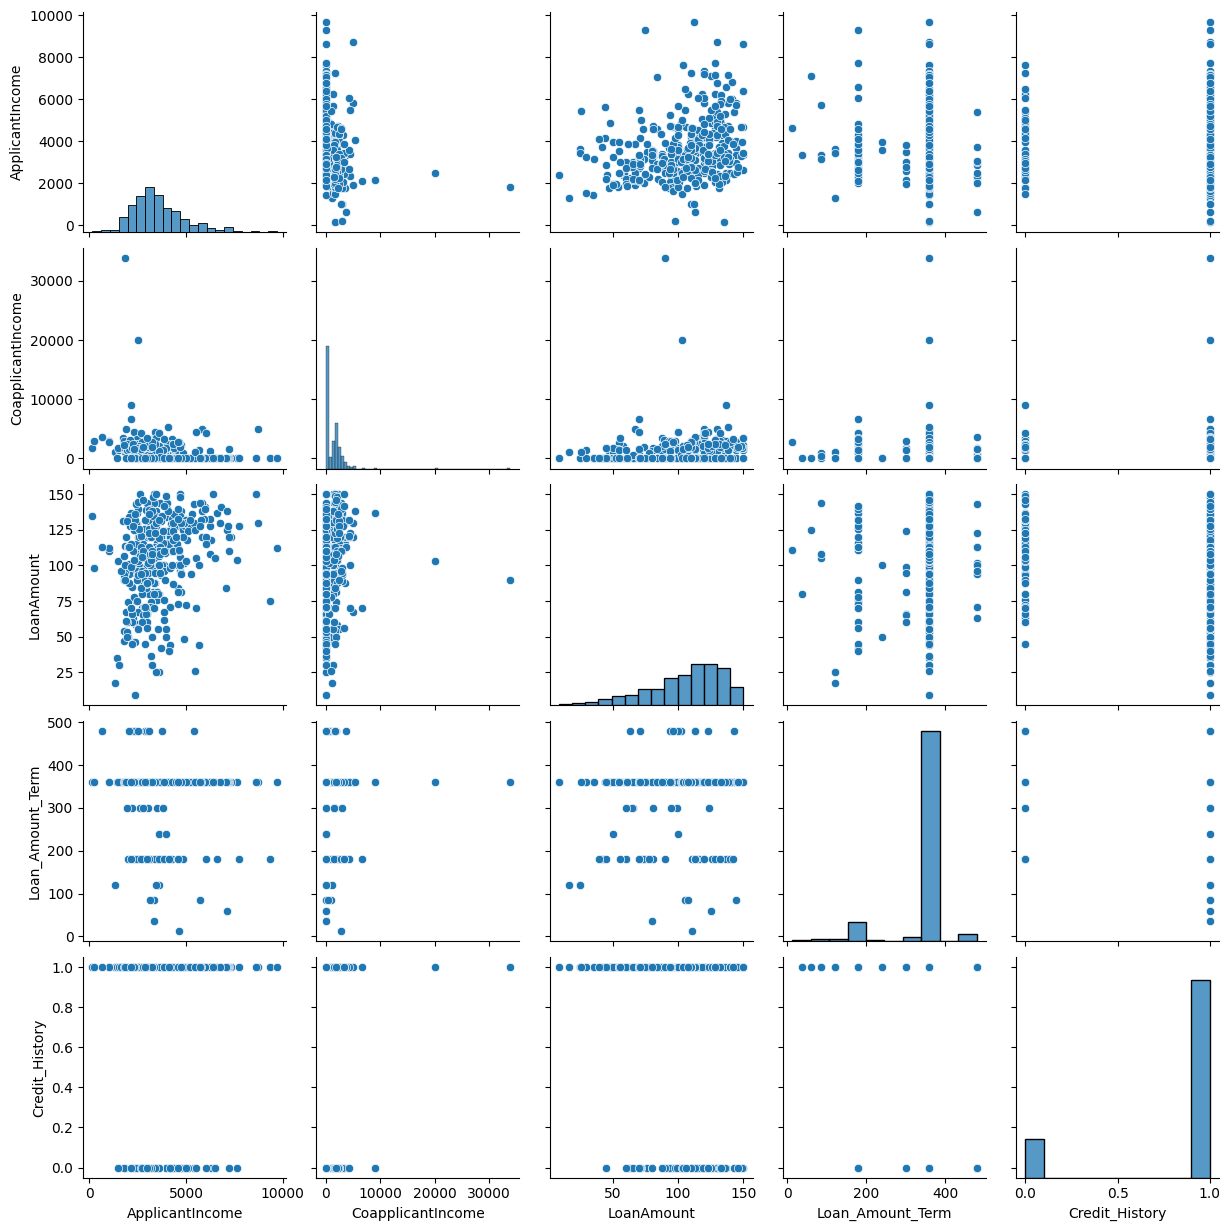

In [63]:
sns.pairplot(df)